# Prédiction de la DREN d'un établissement scolaire

## Objectif du projet
L'objectif de ce projet est de développer un modèle de machine learning capable de prédire la variable **DREN** (Direction Régionale de l'Éducation Nationale) d'un établissement scolaire, en se basant sur plusieurs caractéristiques :

- **Nom d'établissement**
- **Situation géographique**
- **Statut** (public ou privé)
- **Type** (mixte, filles, garçons)

### Objectifs d'apprentissage
Ce projet a pour but d'améliorer mes compétences en tant que data scientist junior, et plus précisément de :

1. **Maîtriser le prétraitement des données** :
   - Gérer les valeurs manquantes dans les colonnes *Situation géographique* et *Type*.
   - Encoder les variables catégorielles (texte) pour qu'elles puissent être utilisées par un modèle de machine learning.

2. **Modélisation** :
   - Sélectionner et entraîner un modèle de classification qui prédit correctement la DREN d'un établissement scolaire. Les modèles envisagés incluent, entre autres, la régression logistique, les forêts aléatoires (Random Forest) et XGBoost.

3. **Évaluation des performances** :
   - Utiliser des métriques telles que la précision, le rappel, ou le F1-score pour mesurer la performance du modèle.
   - Optimiser les hyperparamètres du modèle pour améliorer sa performance sur les données de test.

### Importance du projet
Ce projet sera mis en valeur sur mon portfolio GitHub afin de démontrer ma capacité à :
- Manipuler et prétraiter des données réelles contenant des valeurs manquantes.
- Appliquer des techniques de machine learning pour résoudre une tâche de classification multiclasses.
- Documenter un projet de bout en bout, depuis l'exploration des données jusqu'à l'évaluation du modèle.

Ce projet illustre donc non seulement mes compétences techniques, mais aussi ma capacité à structurer et à résoudre un problème complexe en data science.


## Étapes du projet

1. **Exploration des données (EDA)** :
   - Analyser les colonnes, identifier les valeurs manquantes, et comprendre la distribution des données.

2. **Prétraitement des données** :
   - Gérer les valeurs manquantes et encoder les variables catégorielles.

3. **Division des données** :
   - Séparer les données en ensembles d'entraînement et de test (80/20).

4. **Modélisation** :
   - Entraîner un modèle de classification (régression logistique, Random Forest, etc.).

5. **Évaluation** :
   - Utiliser des métriques (précision, F1-score, etc.) pour évaluer les performances.

6. **Améliorations** :
   - Ajuster les hyperparamètres ou explorer d'autres modèles si nécessaire.

7. **Documentation** :
   - Ajouter des explications claires dans le notebook.


# 0. **Importation des bibliothèques et Chargement des données**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("data.gouv.ci/Liste d'établissements scolaires d'Abidjan - etab_ci.csv")

# 1. **Exploration des données (EDA)** :
  
 Analyser les colonnes, identifier les valeurs manquantes, et comprendre la distribution des données.


In [3]:
df.head(20)

,Nom d'établissement,Situation géographique,DREN,Statut,Type
0,COLLEGE MODERNE MORONDO,NaN,29,PUBLIC,MIXTE
1,COLLEGE CATHOLIQUE KIRMANN ABENGOUROU,ABENGOUROU,11,PRIVE,MIXTE
2,COLLEGE MODERNE AMOIKON DIHYE ABENGOUROU,ABENGOUROU,11,PRIVE,MIXTE
3,COLLEGE ARTISTIQUE ABENGOUROU,ABENGOUROU,11,PRIVE,MIXTE
4,COLLEGE CATHOLIQUE ND DE TOUTES LES GRACES AGN...,AGNIBILEKROU,11,PRIVE,MIXTE
5,COLLEGE EKRA MATHIEU AGNIBILEKROU,AGNIBILEKROU,11,PRIVE,MIXTE
6,COLLEGE MODERNE ABENGOUROU,ABENGOUROU,11,PUBLIC,MIXTE
7,COLLEGE REINE NOUFAN ABENGOUROU,ABENGOUROU,11,PRIVE,MIXTE
8,LYCEE NANAN KOUAKOU KOUAO NIABLE,NIABLE,11,PUBLIC,MIXTE
9,COLLEGE MODERNE TANGUELAN,NaN,11,PUBLIC,MIXTE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Nom d'établissement     1484 non-null   object
 1   Situation géographique  1442 non-null   object
 2   DREN                    1484 non-null   int64 
 3   Statut                  1484 non-null   object
 4   Type                    1483 non-null   object
dtypes: int64(1), object(4)
memory usage: 58.1+ KB


In [5]:
df.describe(include = 'all')

,Nom d'établissement,Situation géographique,DREN,Statut,Type
count,1484,1442,1484.000000,1484,1483
unique,1473,225,NaN,2,3
top,COLLEGE MODERNE PRIVE KONONFLA SINFRA,YOPOUGON,NaN,PRIVE,MIXTE
freq,2,205,NaN,1168,1466
mean,NaN,NaN,27.216981,NaN,NaN
std,NaN,NaN,10.076315,NaN,NaN
min,NaN,NaN,11.000000,NaN,NaN
25%,NaN,NaN,19.000000,NaN,NaN
50%,NaN,NaN,30.000000,NaN,NaN
75%,NaN,NaN,36.000000,NaN,NaN


In [6]:
df.value_counts

<bound method DataFrame.value_counts of                                     Nom d'établissement  \
0                               COLLEGE MODERNE MORONDO   
1                 COLLEGE CATHOLIQUE KIRMANN ABENGOUROU   
2              COLLEGE MODERNE AMOIKON DIHYE ABENGOUROU   
3                         COLLEGE ARTISTIQUE ABENGOUROU   
4     COLLEGE CATHOLIQUE ND DE TOUTES LES GRACES AGN...   
...                                                 ...   
1479                    COLLEGE DES ENSEIGNANTS TOUMODI   
1480                         COLLEGE ESPERANCE YOPOUGON   
1481                  COLLEGE MAMADOU KARABOUE YOPOUGON   
1482                       COLLEGE LES MIGNONS YOPOUGON   
1483                             COLLEGE JOSUE YOPOUGON   

     Situation géographique  DREN  Statut   Type  
0                       NaN    29  PUBLIC  MIXTE  
1                ABENGOUROU    11   PRIVE  MIXTE  
2                ABENGOUROU    11   PRIVE  MIXTE  
3                ABENGOUROU    11   PRIVE  MIXT

In [31]:
df.groupby('Situation géographique')["DREN"].sum()

Situation géographique
ABENGOUROU        165
ABIDJAN            48
ABOBO            5127
ABOISSO           147
ADIAKE             63
                 ... 
ZATTRY             68
ZIKISSO            46
ZOUAN-HOUNIEN      86
ZOUKOUGBEU         75
ZUENOULA          280
Name: DREN, Length: 225, dtype: int64

In [36]:
df.groupby('Situation géographique').agg({"Type":'unique', "DREN":'sum'})

,Type,DREN
Situation géographique,,
ABENGOUROU,[MIXTE],165
ABIDJAN,"[MIXTE, F]",48
ABOBO,[MIXTE],5127
ABOISSO,"[M, MIXTE]",147
ADIAKE,[MIXTE],63
...,...,...
ZATTRY,[MIXTE],68
ZIKISSO,[MIXTE],46
ZOUAN-HOUNIEN,[MIXTE],86


In [8]:
print(df["DREN"].unique())
print(df["DREN"].isna().sum())

[ 29  11  36  31  37  33  21  12  38  13  14  41  35  15 100  16  17  43
  18  39  34  19  20  32  22  27  30  23  26  28  25  44]
0


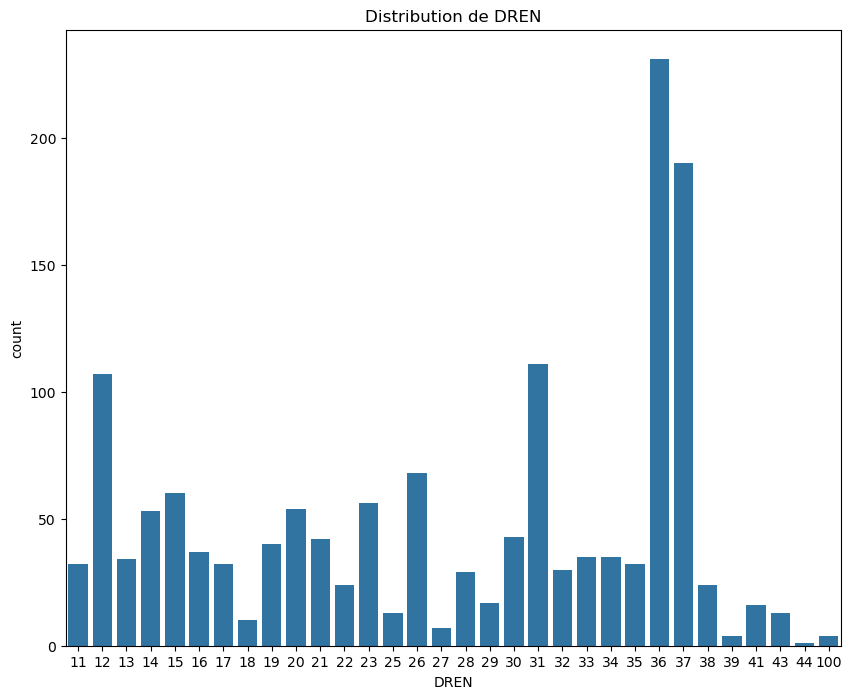

In [7]:
# visualiser la distribution de la variable DREN
plt.figure(figsize=(10,8))
sns.countplot(data= df, x='DREN')
plt.title('Distribution de DREN')
plt.show()

In [9]:
print(df["Type"].unique())

['MIXTE' 'F' 'M' nan]


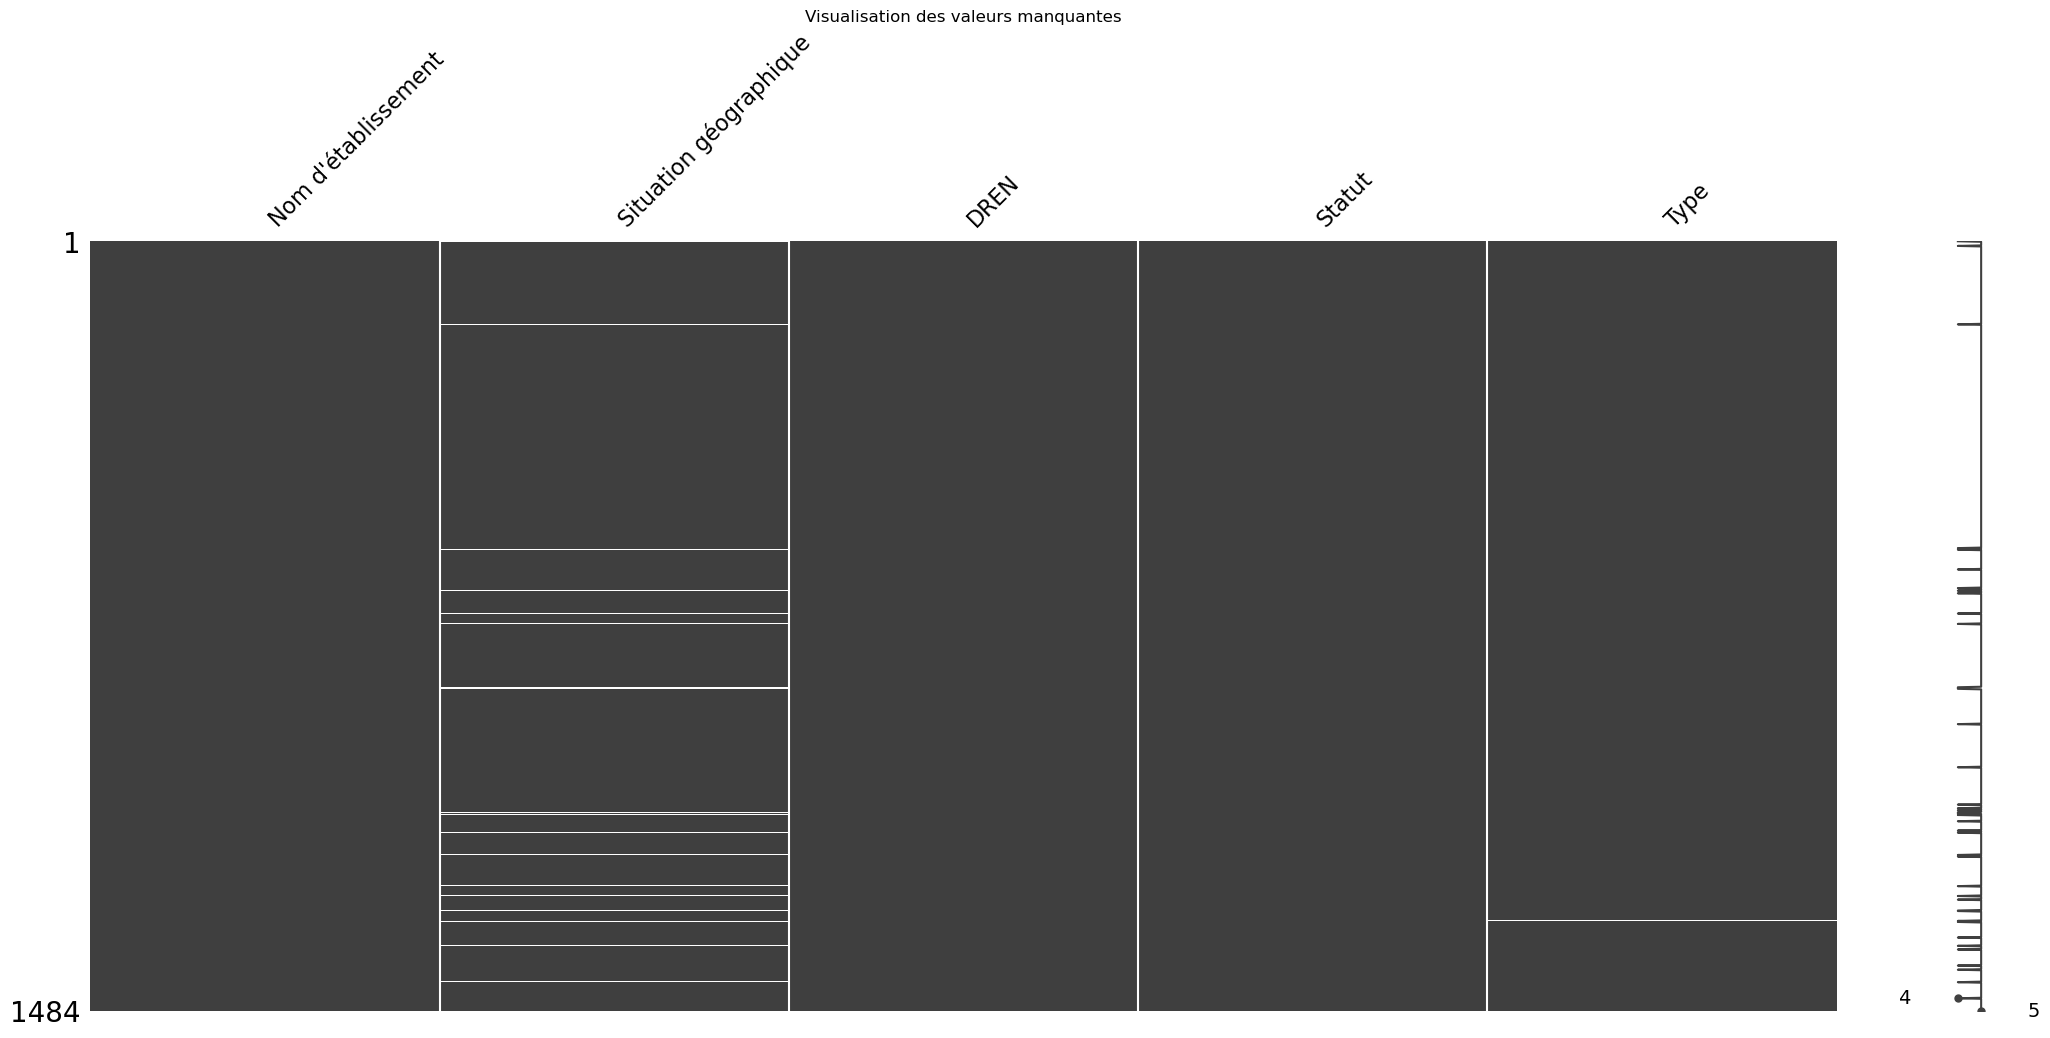

In [10]:
import missingno as msno
msno.matrix(df)
plt.title('Visualisation des valeurs manquantes')
plt.show()

In [11]:
#Afficher les valeurs manquantes 
missingVal = df.isna().sum()
print(f"les valeurs manquantes par colonnes : {missingVal}")

les valeurs manquantes par colonnes : Nom d'établissement        0
Situation géographique    42
DREN                       0
Statut                     0
Type                       1
dtype: int64


# 2. **Prétraitement des données** :

Gérer les valeurs manquantes et encoder les variables catégorielles.


In [12]:
# Gestion des valeurs manquantes avec un SimpleImputer et encodage des variables catégorielles
df.dropna(axis=0, inplace=True)
X = df.drop(columns=['DREN'])  # Features
y = df['DREN']  # Cible

# 3. **Division des données** :
Séparer les données en ensembles d'entraînement et de test (80/20).

In [13]:
# 4. Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
# Créer le transformateur pour le prétraitement
# Création du préprocesseur avec normalisation pour les colonnes numériques
preprocessor = ColumnTransformer(transformers=[
    ("ohe_Nom_d_établissement", OneHotEncoder(handle_unknown="ignore"), [0]),  # 'Nom d'établissement'
    ("ohe_Situation géographique", OneHotEncoder(handle_unknown="ignore"), [1]),  # 'Situation géographique'
    ("ohe_Statut", OneHotEncoder(handle_unknown="ignore"), [2]),  # 'travel_with
    ("ohe_Type", OneHotEncoder(handle_unknown="ignore"), [3]),  # 'travel_with

])


In [16]:
# Créer le pipeline avec le préprocesseur et le modèle
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000, class_weight='balanced'))
])



In [17]:
# Entraîner le modèle
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe_Nom_d_établissement',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0]),
                                                 ('ohe_Situation géographique',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [1]),
                                                 ('ohe_Statut',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2]),
                                                 ('ohe_Type',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [3])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [18]:
# Faire des prédictions sur l'ensemble de validation
y_pred = clf.predict(X_test)

# 5. **Évaluation** :
Utiliser des métriques (précision, F1-score, etc.) pour évaluer les performances.


In [19]:
# Évaluer le modèle
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision de la régression logistique avec OneHotEncoder : {accuracy * 100:.2f}%")
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Précision de la régression logistique avec OneHotEncoder : 91.35%
Rapport de classification :
               precision    recall  f1-score   support

          12       1.00      0.93      0.97        15
          13       1.00      0.75      0.86         8
          14       1.00      0.90      0.95        10
          15       1.00      0.94      0.97        17
          16       1.00      0.83      0.91         6
          17       1.00      0.75      0.86         8
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         8
          20       1.00      0.85      0.92        13
          21       1.00      1.00      1.00         9
          22       1.00      1.00      1.00         2
          23       1.00      0.77      0.87        13
          25       1.00      1.00      1.00         3
          26       1.00      1.00      1.00        11
          27       0.00      0.00      0.00         1
          28       1.00      1.00      1

/home/richardbbn/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/richardbbn/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/richardbbn/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Nous avons obtenu une précision globale de 89.97% avec la régression logistique et un rapport de classification qui montre des variations significatives dans la performance pour différentes classes.

**Analyse du rapport de classification :**

Précision : Très élevée pour la plupart des classes (souvent 1.00), ce qui signifie que lorsque le modèle prédit une classe donnée, il est généralement correct. Cependant, quelques classes ont des précisions faibles, voire nulles (comme les classes 16, 31, 41, 43, et 100).

La classe 16 a un rappel de 1.00, ce qui signifie que toutes les instances de cette classe sont bien capturées, mais sa faible précision (0.32) montre que beaucoup de fausses prédictions sont faites pour cette classe.

La classe 16 a un F1-score bas (0.48), dû à la grande différence entre sa précision et son rappel.

Classes avec des résultats faibles :

Les classes 27, 39, et 100 ont des scores très faibles (0.00). Ces classes sont sont mal représentées dans les données, donc difficiles à prédire pour le modèle.
La classe 41 a un F1-score de 0.57 avec un rappel de 0.40, ce qui indique que le modèle a des difficultés à capturer toutes les instances de cette classe.

Si certaines classes sont sous-représentées, on pourrais envisager des méthodes de rééchantillonnage (oversampling ou undersampling), ou utiliser des métriques pondérées pour compenser l'effet des classes peu représentées.




Si ton modèle de régression logistique a du mal à prédire certaines classes, tu peux envisager d'utiliser un modèle plus complexe, comme un Random Forest ou un Gradient Boosting. Ces modèles peuvent mieux gérer les données déséquilibrées et capturer des interactions plus complexes entre les variables.



# 6. **Améliorations** :
Ajustement des hyperparamètres ou exploration d'autres modèles.

In [20]:
# Division des données en ensembles d'entraînement et de validation pour notre modèle random_forest rf_model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Label Encoder for targets
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
# Créer le transformateur pour le prétraitement
# Création du préprocesseur avec normalisation pour les colonnes numériques
preprocessor = ColumnTransformer(transformers=[
    ("ohe_Nom_d_établissement", OneHotEncoder(handle_unknown="ignore"), [0]),  # 'Nom d'établissement'
    ("ohe_Situation géographique", OneHotEncoder(handle_unknown="ignore"), [1]),  # 'Situation géographique'
    ("ohe_Statut", OneHotEncoder(handle_unknown="ignore"), [2]),  # 'Statut'
    ("ohe_Type", OneHotEncoder(handle_unknown="ignore"), [3]),  # 'Type'

])


In [22]:
# Initialiser le modèle de Forêt Aléatoire avec des poids de classe équilibrés


# Créer le pipeline avec la forêt aléatoire
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])


In [23]:
# Entraîner le modèle
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe_Nom_d_établissement',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0]),
                                                 ('ohe_Situation géographique',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [1]),
                                                 ('ohe_Statut',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2]),
                                                 ('ohe_Type',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [3])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [24]:
# Prédictions
y_pred_rf = rf_model.predict(X_val)

In [25]:
# Évaluer le modèle
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Précision de la Forêt Aléatoire : {accuracy_rf * 100:.2f}%")

# Matrice de confusion
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure()
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.show()

# Rapport de classification
print("Rapport de classification :\n", classification_report(y_val, y_pred_rf))


Précision de la Forêt Aléatoire : 86.14%


NameError: name 'confusion_matrix' is not defined